## SGD Algorithm to predict movie ratings

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
from sklearn.utils.extmath import randomized_svd
import pandas as pd
import numpy as np
import sklearn.decomposition as skd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

## Task 1

In [2]:
data = pd.read_csv("ratings_train.csv", index_col=False)
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [3]:
data.shape

(89992, 3)

In [4]:
edges = [tuple(x) for x in data.values.tolist()]

unique_user_id = data['user_id'].unique()
unique_movie_id = data['item_id'].unique()
len(unique_user_id ),len(unique_movie_id)
ui=np.max(unique_user_id)+1
mi=np.max(unique_movie_id)+1

In [5]:
def initialize(dim):
    bv=np.zeros(dim)
    return bv

b_i=initialize(ui)
c_j=initialize(mi)
b_i.shape, c_j.shape


((943,), (1681,))

In [7]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((ui, mi), dtype=np.int16).toarray()
adjacency_matrix.shape

(943, 1681)

In [9]:
# AdjMatrix=np.zeros((ui, mi))
edges = [tuple(x) for x in data.values.tolist()]
for e in edges:
    adjacency_matrix[e[0]][e[1]]=e[2]
    

U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)
V=VT.T

(943, 2)
(2,)
(1681, 2)


<font color='cyan'>Grader function - 1</font>

In [8]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

In [10]:
def m_u(ratings):
    mu=ratings.mean()
    return mu

In [11]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [12]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='cyan'>Grader function -3 </font>

In [13]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

In [18]:
def derivative_db(ui,vj,bi,cj,alpha,mu,yi):
    '''In this function, we will compute dL/db_i'''
    db=2*alpha*bi-2*(yi-mu-bi-cj-np.dot(np.transpose(ui),vj))
    return db

<font color='cyan'>Grader function -4 </font>

In [ ]:
def grader_db (value):
    assert(np.round(value,3)==-0.931)
    return True

U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

In [14]:
def derivative_dc(ui,vj,bi,cj,alpha,mu,yi):
    '''In this function, we will compute dL/dc_j'''
    dc=2*alpha*cj-2*(yi-mu-bi-cj-np.dot(ui.T,vj))
    return dc

<font color='cyan'>Grader function - 5 </font>

In [ ]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,alpha,mu)
grader_dc(value)

In [15]:
def Predict(mu,ui,vj,bi,cj):
    yp=mu+bi+cj+np.dot(ui.T,vj)
   
    return yp

In [19]:
def sgd_LogistcRegression(mu, U, V, AdjMatrix, bi_random, cj_random, alpha, lr_rate, n_epochs):
    logloss=[]
    N=len(U)
    M=len(V)
        
    for epoch in range(n_epochs):
    
        wtperror=[]
        
        for i in range(N):
            ui=U[i,:]
            bi=bi_random[i]
            interror=[]
            for j in range(M):
                vj=V[j,:]
                cj=cj_random[j]
                yi=AdjMatrix[i,j]
                yp=Predict(mu,ui,vj,bi,cj)
                
                mse=((yi-yp)**2)
                bi -= lr_rate* derivative_db(ui,vj,bi,cj,alpha,mu,yi)
                cj -= lr_rate* derivative_dc(ui,vj,bi,cj,alpha,mu,yi)
               
                # value=derivative_db(312,98,4,U,V,mu,alpha)
                bi_random[i] = bi
                cj_random[j] = cj 
                interror.append( mse)
                
            wtperror.append(np.mean(interror))
            # logloss_Train.append(wtperror)

        logloss.append(np.mean(wtperror))
        print("Epoch: %d, Loss: %.3f" %(epoch+1, np.mean(wtperror)))

    # Plot train and test error in each iteration
    plt.figure()
    plt.plot(range(epoch+1), np.reshape(logloss,[len(logloss), 1]), label = "Train LogLoss")
    plt.title("Logloss per iteration")
    plt.xlabel("Number of iterations")
    plt.ylabel("Logloss")
    plt.legend()
    plt.show()
    return bi, cj

Epoch: 1, Loss: 1.314
Epoch: 2, Loss: 0.838
Epoch: 3, Loss: 0.618
Epoch: 4, Loss: 0.616
Epoch: 5, Loss: 0.616
Epoch: 6, Loss: 0.616
Epoch: 7, Loss: 0.616
Epoch: 8, Loss: 0.616
Epoch: 9, Loss: 0.616
Epoch: 10, Loss: 0.616
Epoch: 11, Loss: 0.616
Epoch: 12, Loss: 0.616
Epoch: 13, Loss: 0.616
Epoch: 14, Loss: 0.616
Epoch: 15, Loss: 0.616
Epoch: 16, Loss: 0.616
Epoch: 17, Loss: 0.616
Epoch: 18, Loss: 0.616
Epoch: 19, Loss: 0.616
Epoch: 20, Loss: 0.616
Epoch: 21, Loss: 0.616
Epoch: 22, Loss: 0.616
Epoch: 23, Loss: 0.616
Epoch: 24, Loss: 0.616
Epoch: 25, Loss: 0.616
Epoch: 26, Loss: 0.616
Epoch: 27, Loss: 0.616
Epoch: 28, Loss: 0.616
Epoch: 29, Loss: 0.616
Epoch: 30, Loss: 0.616


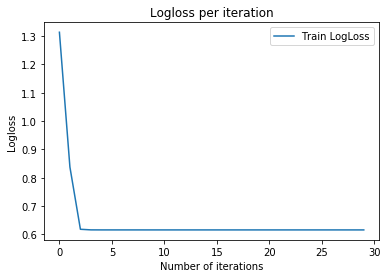

In [21]:
mu=m_u(data['rating'])
mu=np.round(mu,3)
n_epochs=30
lr_rate=0.001
alpha=0.01 
bi_optimal, cj_optimal = sgd_LogistcRegression(mu,U, V, adjacency_matrix, b_i, c_j, alpha, lr_rate, n_epochs)

## Task 2

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [23]:
user_info = pd.read_csv("user_info.csv.txt")
user_info.head()
yi=user_info["is_male"]

In [24]:
sgd_model = SGDClassifier() # instantiate
# sgd_clf.fit(X_train, y_train_5) # train the classifier

k_SVD=[5, 10, 15, 20, 25, 30]

for k in k_SVD:
    SVD= skd.TruncatedSVD( n_components=k)
    
    U = SVD.fit_transform(adjacency_matrix)
    Sigma = SVD.explained_variance_ratio_
    VT = SVD.components_
    V=VT.T
    sgd_model.fit(U,yi)
    predicted =sgd_model.predict(U)
    
    print("k is = ",k)
    cm=confusion_matrix(yi, predicted)
    print("confusion matrix is = ",cm)
    ps=precision_score(yi, predicted)
    print("precision score is = ",ps)
    rs=recall_score(yi, predicted)
    print("recallF1 score is = ",rs)
    f1s=f1_score(yi, predicted)
    print("F1 score is = ", f1s)
    


k is =  5
confusion matrix is =  [[ 81 192]
 [ 77 593]]
precision score is =  0.7554140127388536
recallF1 score is =  0.8850746268656716
F1 score is =  0.8151202749140893
k is =  10
confusion matrix is =  [[250  23]
 [477 193]]
precision score is =  0.8935185185185185
recallF1 score is =  0.2880597014925373
F1 score is =  0.43566591422121886
k is =  15
confusion matrix is =  [[ 82 191]
 [ 65 605]]
precision score is =  0.7600502512562815
recallF1 score is =  0.9029850746268657
F1 score is =  0.8253751705320601
k is =  20
confusion matrix is =  [[ 68 205]
 [ 51 619]]
precision score is =  0.7512135922330098
recallF1 score is =  0.9238805970149254
F1 score is =  0.8286479250334673
k is =  25
confusion matrix is =  [[ 41 232]
 [ 10 660]]
precision score is =  0.7399103139013453
recallF1 score is =  0.9850746268656716
F1 score is =  0.8450704225352114
k is =  30
confusion matrix is =  [[ 79 194]
 [ 39 631]]
precision score is =  0.7648484848484849
recallF1 score is =  0.9417910447761194
F1